In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head(2)

,BrukerID,Kjonn,Alder,Jobb,Postkode,FilmID,Rangering,Tidstempel,Tittel,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,M,50.0,16.0,55405-2546,2160,5,976229487.0,"Pope of Greenwich Village, The (1984)",1,...,0,0,0,0,0,0,0,0,0,0
1,1,M,50.0,16.0,55405-2546,2588,3,976229487.0,Jurassic Park (1993),1,...,0,0,0,0,0,0,1,0,0,0


In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
non_numerics = ['object']
categorical_columns = list(df.select_dtypes(include=non_numerics).columns)
numerics_columns = list(df.select_dtypes(include=numerics).columns)

In [12]:
## add movie length
df = df.assign(
    title_length=df['Tittel'].apply(lambda s: len(s))
)
df.head(2)

,BrukerID,Kjonn,Alder,Jobb,Postkode,FilmID,Rangering,Tidstempel,Tittel,Action,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title_legth,title_length
0,1,M,50.0,16.0,55405-2546,2160,5,976229487.0,"Pope of Greenwich Village, The (1984)",1,...,0,0,0,0,0,0,0,0,37,37
1,1,M,50.0,16.0,55405-2546,2588,3,976229487.0,Jurassic Park (1993),1,...,0,0,0,0,1,0,0,0,20,20


#### Is the title length related to the ranking ?

In [22]:
methods=["kendall", "spearman", "pearson"]
for method in methods:
    corr = df[['Rangering', 'title_length']].corr(method=method).to_dict()
    values = round(corr['Rangering']['title_length'], 4)
    print(f"{method} correlation coefficient: {values}")

kendall correlation coefficient: 0.0132
spearman correlation coefficient: 0.018
pearson correlation coefficient: 0.0177


In [66]:
rank_title = df[['Rangering', 'title_length']]
all_count = rank_title['title_length'].count()
low_ranking = rank_title[rank_title['Rangering'] < 2.5]
high_ranking = rank_title[rank_title['Rangering'] > 2.5]

print(f" low ranke percent: {low_ranking['Rangering'].count()/all_count} %")
print(f" high ranke percent: {high_ranking['Rangering'].count()/all_count} %")

 low ranke percent: 0.1399820302507326 %
 high ranke percent: 0.8600179697492674 %


#### About 86 % of the ranking are above 2.5, while 13 % of the ranking are bellow 2.5 (This should have been analysed during the description of the ranking distribution overall)

In [69]:
## mean of title length for each group
dfs = {'low_ranking': low_ranking, 'high_ranking': high_ranking}
for name in dfs:
    average_ranking = dfs[name]['title_length'].mean()
    print(f"{name} average title length {average_ranking}")
print(f"mean title length overal {df['title_length'].mean()}")

low_ranking average title length 23.424537223102202
high_ranking average title length 23.311239420414775
mean title length overal 23.32709907685791


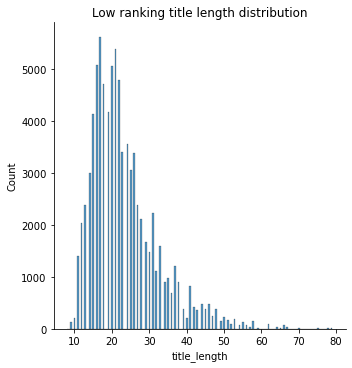

In [32]:
## how are the low ranking and high ranking title length distributed
sns.displot(low_ranking['title_length'])
plt.title("Low ranking title length distribution")
plt.show()

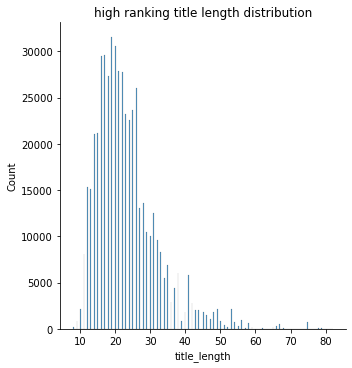

In [33]:
sns.displot(high_ranking['title_length'])
plt.title("high ranking title length distribution")
plt.show()

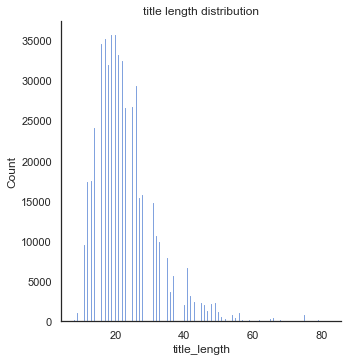

In [70]:
sns.displot(df['title_length'])
plt.title("title length distribution")
plt.show()

In [71]:


#sns.set(style="white", palette="muted", color_codes=True)
#rs = np.random.RandomState(10)
# Set up the matplotlib figure
#f, axes = plt.subplots(1, 2, figsize=(7, 7), sharex=True)
#sns.despine(left=True)
# Generate a random univariate dataset
#d = rs.normal(size=100)
# Plot a simple histogram with binsize determined automatically
#sns.distplot(high_ranking['title_length'], kde=False, color="b", ax=axes[0], label="high ranking")
#sns.displot(high_ranking['title_length'], ax=axes[0])
#sns.displot(high_ranking['title_length'], ax=axes[1])
# Plot a kernel density estimate and rug plot
#sns.distplot(low_ranking['title_length'], kde=False, color="r", ax=axes[1], label="low ranking")
# Plot a filled kernel density estimate
#sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
# Plot a histogram and kernel density estimate
#sns.distplot(d, color="m", ax=axes[1, 1])
#plt.setp(axes, yticks=[])
#plt.legend()
#plt.tight_layout()

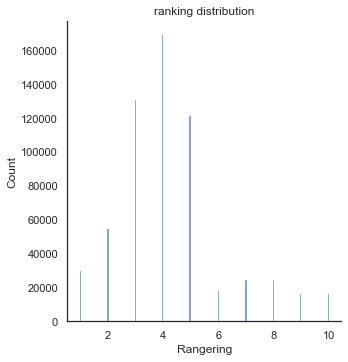

In [72]:
sns.displot(df['Rangering'])
plt.title("ranking distribution")
plt.show()

#### is Gender related to movie ranking?

In [73]:
df_rg = df[['Kjonn', 'Rangering']]

In [74]:
df_rg.head(2)

,Kjonn,Rangering
0,M,5
1,M,3


In [77]:
df_group = df_rg.groupby('Kjonn').mean()
df_group

,Rangering
Kjonn,
F,4.486835
M,4.230667


#### What type of movies score higher?

In [81]:
cols_mtype = ['Rangering'] + list(df.loc[:,'Action':].columns)[:-2]
cols_mtype

['Rangering',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [82]:
df_mtype = df[cols_mtype]
df_mtype.head(2)

,Rangering,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [86]:
mtypes = list(df.loc[:,'Action':].columns)[:-2]

In [101]:
type_scores = {}
for col in mtypes:
    df_temp = df_mtype[['Rangering', col]]
    average_ranking = df_temp[df_temp[col] != 0]['Rangering'].mean()
    type_scores[col] = average_ranking
sorted_dict = dict(sorted(type_scores.items(), key=lambda x: x[1], reverse=True))
sorted_dict

{'Film-Noir': 4.96566757493188,
 'Documentary': 4.702051173609642,
 'War': 4.683108938076543,
 'Drama': 4.539171330480177,
 'Crime': 4.451309506583707,
 'Mystery': 4.443319668702418,
 'Musical': 4.433440643863179,
 'Animation': 4.424134129186784,
 'Romance': 4.375333446847153,
 'Western': 4.336716751918159,
 'Thriller': 4.269557845198238,
 'Children': 4.233923176521364,
 'Comedy': 4.213026805624236,
 'Adventure': 4.186648401379681,
 'Action': 4.177390886258532,
 'Fantasy': 4.176635092467298,
 'Sci-Fi': 4.1617493089873525,
 'Horror': 3.7920037669620306}

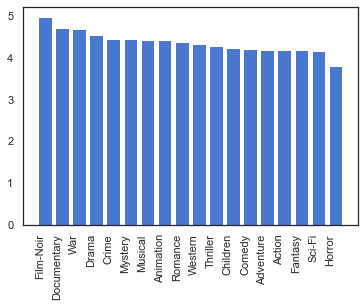

In [103]:
plt.bar(sorted_dict.keys(), sorted_dict.values())
plt.xticks(rotation=90, ha='right')
plt.show()

#### correlation for numerical column



<AxesSubplot:>

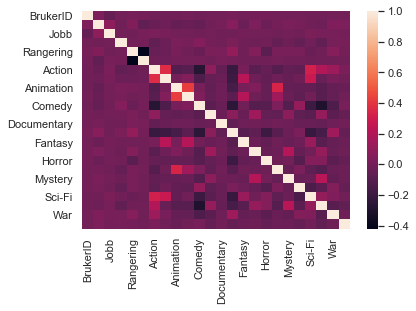

In [107]:
corr_num = df[numerics_columns].corr(method='spearman')
sns.heatmap(corr_num)

In [108]:
corr_num.to_dict()

{'BrukerID': {'BrukerID': 1.0,
  'Alder': 0.03175827298908449,
  'Jobb': -0.04295074209859024,
  'FilmID': -0.0011426676856880352,
  'Rangering': 0.012181430464426919,
  'Tidstempel': 0.00342271357346021,
  'Action': -0.011616739054903846,
  'Adventure': -0.003567134788591934,
  'Animation': -0.005418023389964412,
  'Children': -0.002017544827931132,
  'Comedy': -0.003978250227738245,
  'Crime': 0.001237080866898762,
  'Documentary': 0.0011640319659738285,
  'Drama': 0.011161779679580736,
  'Fantasy': -0.00028344762760634324,
  'Film-Noir': 0.005553506146817708,
  'Horror': 0.00555426900595273,
  'Musical': -0.0015311561499761776,
  'Mystery': 0.0007855776663776314,
  'Romance': 0.0005413545878091856,
  'Sci-Fi': -0.0038139542956533187,
  'Thriller': -0.0036739078193432926,
  'War': 0.002053203651935398,
  'Western': -0.00262957989601788},
 'Alder': {'BrukerID': 0.03175827298908449,
  'Alder': 1.0,
  'Jobb': 0.08730321514297551,
  'FilmID': -0.008005259710915133,
  'Rangering': 0.04546

In [109]:
conts = []
target = "Rangering"
for col in numerics_columns:
    corr = corr_num.to_dict()[col][target]
    conts.append((target, col, corr))
conts

[('Rangering', 'BrukerID', 0.012181430464426919),
 ('Rangering', 'Alder', 0.0454610742918825),
 ('Rangering', 'Jobb', -0.013497715804738929),
 ('Rangering', 'FilmID', 0.0016072062591838412),
 ('Rangering', 'Rangering', 1.0),
 ('Rangering', 'Tidstempel', -0.4184468322888219),
 ('Rangering', 'Action', -0.03878326478919502),
 ('Rangering', 'Adventure', -0.025663517785248755),
 ('Rangering', 'Animation', 0.015887262514113563),
 ('Rangering', 'Children', -0.006387430029647671),
 ('Rangering', 'Comedy', -0.03379906341646891),
 ('Rangering', 'Crime', 0.02683196449947674),
 ('Rangering', 'Documentary', 0.0218043163193888),
 ('Rangering', 'Drama', 0.10571038541743949),
 ('Rangering', 'Fantasy', -0.013732105091988788),
 ('Rangering', 'Film-Noir', 0.051267623634639894),
 ('Rangering', 'Horror', -0.08066174220120406),
 ('Rangering', 'Musical', 0.01607987449118459),
 ('Rangering', 'Mystery', 0.015861357580198826),
 ('Rangering', 'Romance', 0.015627025263217114),
 ('Rangering', 'Sci-Fi', -0.03348633

### there are very little correlation between the columns and the target 
### A tree base method is advisable